# 1. Be the right person ..

In [1]:
import sys
sys.path.append('../../src')
from data_loading import *
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from stats_helpers import *

```python
data_2018 = YearLoader(2018)
data_2018.get_dataframe("characteristics")
data_2018.get_dataframe("locations")
data_2018.get_dataframe("passengers")
data_2018.get_dataframe("vehicles")
```

## Population Pyramids (driver)

In [2]:
# Load dataset
data_2018 = YearLoader(2018)
# Check if nan in an_nais
print(np.unique(YearLoader(2018).get_dataframe("passengers")['an_nais'].values))

[1911. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926.
 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938.
 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950.
 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962.
 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974.
 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986.
 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.
 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan]


In [3]:
YearLoader(2018).get_dataframe("passengers")

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
130164,201800057781,NaN,3,4,1,9.0,3.0,4.0,3.0,1.0,1975.0,A01
130165,201800057782,1.0,1,4,2,9.0,11.0,NaN,NaN,NaN,1993.0,A01
130166,201800057782,1.0,1,4,1,9.0,21.0,NaN,NaN,NaN,1974.0,B01
130167,201800057783,1.0,1,4,1,9.0,11.0,NaN,NaN,NaN,1973.0,B01


### Plots

In [4]:
def get_dead_alive_gender_df(data):
    """Create a DataFrame (male_dead, male_alive, female_dead, female_alive) for each age group.

    If the age can't be computed or age is greater than 150 years old, age_group is '?'.

    Parameters
    ----------
    data : YearLoader
        Dataset loading class.

    Returns
    -------
    pandas.DataFrame
        Dead/Alive count for each age-group and gender

    """
    # Load passengers dataset
    passengers = data.get_dataframe("passengers")
    year = data.year
    
    
    # Compute dead/alive for female/male
    passengers['male_dead'] = passengers.apply(lambda x: 1 if x.grav==2 and x.sexe==1 else 0, axis=1)
    passengers['male_alive'] = passengers.apply(lambda x: 1 if x.grav!=2 and x.sexe==1 else 0, axis=1)
    passengers['female_dead'] = passengers.apply(lambda x: 1 if x.grav==2 and x.sexe==2 else 0, axis=1)
    passengers['female_alive'] = passengers.apply(lambda x: 1 if x.grav!=2 and x.sexe==2 else 0, axis=1)
    
    # Compute age
    passengers['age_group'] = passengers.apply(lambda x: 15 if math.isnan(x.an_nais) else int((year - x.an_nais)//10), axis=1)
    pyramid_data = passengers[['male_dead', 'male_alive', 'female_dead', 'female_alive', 'age_group']]
    
    pyramid_data = pyramid_data.groupby(['age_group']).sum(axis=1).sort_values('age_group')#.drop('sort', axis=1)
    pyramid_data.reset_index(level=0, inplace=True)
    # Age categorie to age group
    pyramid_data['age_group'] = pyramid_data.apply(lambda x : '?' if x.age_group ==15 else str(x.age_group)+'0-'+str(x.age_group+1)+'0', axis=1)
    
    return pyramid_data
    
pyramid_data = get_dead_alive_gender_df(data_2018)
pyramid_data

,age_group,male_dead,male_alive,female_dead,female_alive
0,00-10,34,2283,25,1695
1,10-20,201,9258,59,4614
2,20-30,582,21350,116,9552
3,30-40,395,16570,77,6990
4,40-50,361,13621,67,5832
5,50-60,364,11273,73,5177
6,60-70,261,6086,92,3514
7,70-80,196,3238,103,2281
8,80-90,174,1636,136,1312
9,90-100,46,260,29,197


In [5]:
#pyramid_data.sum()
pyramid_data['male_dead'].sum()

2615

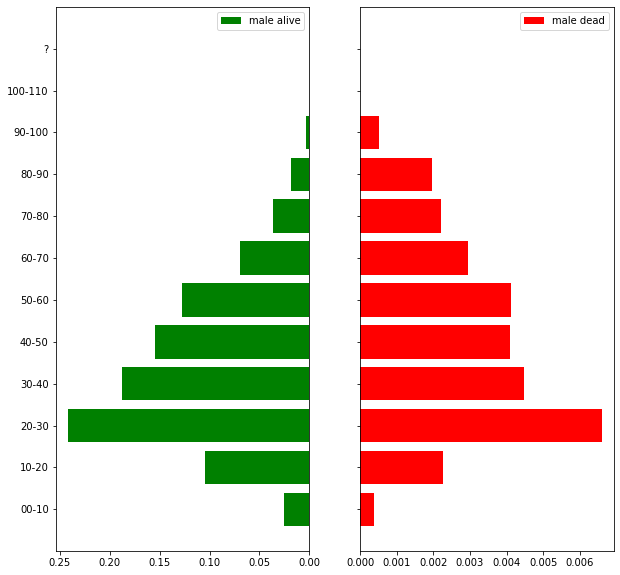

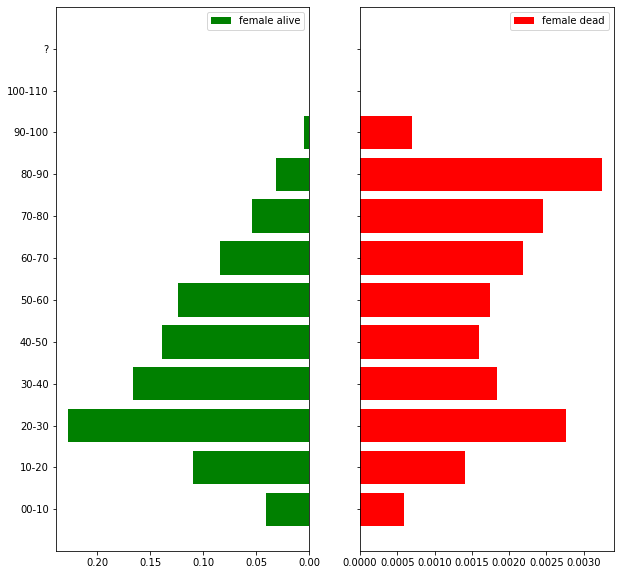

In [6]:
def plot_pyramid_dead_alive_gender(df, female=False, male=True, figsize=(10,10), xlim = None):
    """Plot population pyramid (male_dead, male_alive, female_dead, female_alive) for each age group.

    Parameters
    ----------
    df : pandas.DataFrame
        pyramid_data (get_dead_alive_gender_df() function).
    female : bool
        show female plot.
    male : bool
        show male plot.
    figsize : tuple
        (x, y) figsize for plots.
    xlim : tuple
        (min,max) x axis limits.
    """

    if male:
        fig_male, axes_male = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_male[0].barh(df['age_group'], df['male_alive']/(pyramid_data['male_alive'].sum()+pyramid_data['male_dead'].sum()), align='center', color='green')
        axes_male[1].barh(df['age_group'], df['male_dead']/(pyramid_data['male_alive'].sum()+pyramid_data['male_dead'].sum()), align='center', color='red')
        axes_male[0].set_xlim(xlim)
        axes_male[1].set_xlim(xlim)
        axes_male[0].invert_xaxis()
        axes_male[0].legend(['male alive'])
        axes_male[1].legend(['male dead'])
        plt.show()
        
    if female:
        
        fig_female, axes_female = plt.subplots(ncols=2, sharey=True, figsize=figsize)
        axes_female[0].barh(df['age_group'], df['female_alive']/(pyramid_data['female_alive'].sum()+pyramid_data['female_dead'].sum()), align='center', color='green')
        axes_female[1].barh(df['age_group'], df['female_dead']/(pyramid_data['female_alive'].sum()+pyramid_data['female_dead'].sum()), align='center', color='red')
        axes_female[0].set_xlim(xlim)
        axes_female[1].set_xlim(xlim)
        axes_female[0].invert_xaxis()
        axes_female[0].legend(['female alive'])
        axes_female[1].legend(['female dead'])

        plt.show()

#plot_pyramid_dead_alive_gender(pyramid_data, male=True, female=True, xlim= (0,22000))
plot_pyramid_dead_alive_gender(pyramid_data, male=True, female=True, xlim= None)

# Gravity and Gender

In [7]:
data = YearLoader(2018).get_dataframe("passengers")

gender_stats = ChiSquare(data['sexe'],data['grav'])


contingency_table :-
 grav      1     2      3      4
sexe                           
1     39028  2615  15487  31088
2     15220   777   6682  19272
Observed Values :-
 [[39028  2615 15487 31088]
 [15220   777  6682 19272]]
Expected Values :-
 [[36764.89843204  2298.82273045 15024.35174273 34129.92709478]
 [17483.10156796  1093.17726955  7144.64825727 16230.07290522]]
Degree of Freedom:- 1
chi-square statistic:- 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 567.1888411192656
critical_value: 3.841458820694124
p-value: 0.0
Chi-square test result : Reject H0, There is a relationship between 2 categorical variables
Reject H0 with 95% level of confidence.


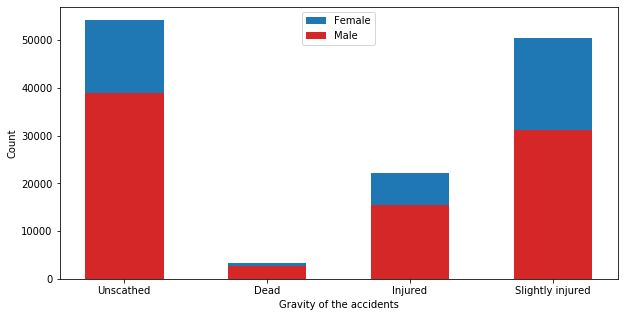

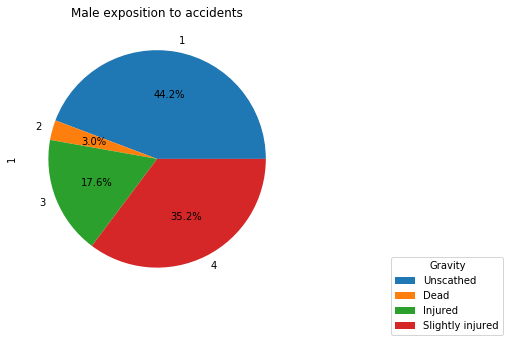

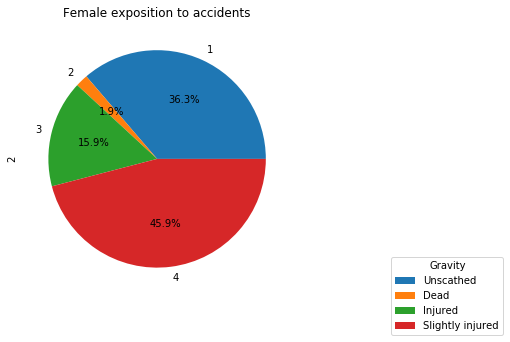

In [8]:
plot_gender_vs_gravity_contingency(YearLoader(2018))

## Types of vehicles

In [9]:
def get_vehicles_type_df(data, top_k):
    """Create a DataFrame (catv).

    Count number of vehicles per category

    Parameters
    ----------
    data : YearLoader
        Dataset loading class.
    top_k : int
        get top_k value.

    Returns
    -------
    pandas.DataFrame
        Vehicles categories count DataFrame.

    """
    types = {
        1 : 'Bicyclette',
        2 : 'Cyclomoteur <50cm3',
        3 : 'Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")',
        4 : 'Référence plus utilisée depuis 2006 (scooter immatriculé)',
        5 : 'Référence plus utilisée depuis 2006 (motocyclette)',
        6 : 'Référence plus utilisée depuis 2006 (side-car)',
        7 : 'VL seul',
        8 : 'Catégorie plus utilisée (VL + caravane)',
        9 : 'Catégorie plus utilisée (VL + remorque)',
        10 : 'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)',
        11 : 'Référence plus utilisée depuis 2006 (VU (10) + caravane)',
        12 : 'Référence plus utilisée depuis 2006 (VU (10) + remorque)',
        13 : 'PL seul 3,5T <PTCA <= 7,5T',
        14 : 'PL seul > 7,5T',
        15 : 'PL > 3,5T + remorque',
        16 : 'Tracteur routier seul',
        17 : 'Tracteur routier + semi-remorque',
        18 : 'Référence plus utilisée depuis 2006 (transport en commun)',
        19 : 'Référence plus utilisée depuis 2006 (tramway)',
        20 : 'Engin spécial',
        21 : 'Tracteur agricole',
        30 : 'Scooter < 50 cm3',
        31 : 'Motocyclette > 50 cm3 et <= 125 cm3',
        32 : 'Scooter >50cm3 et<=125cm3',
        33 : 'Motocyclette > 125 cm3',
        34 : 'Scooter > 125 cm3',
        35 : 'Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)',
        36 : 'Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)',
        37 : 'Autobus',
        38 : 'Autocar',
        39 : 'Train',
        40 : 'Tramway',
        99 : 'Autre véhicule'
    }
    
    # Get vehicles DataFrame
    vehicles = data.get_dataframe("vehicles")
    
    # Count vehicles per category
    vehicles_cat = pd.DataFrame(vehicles['catv'].value_counts())
    vehicles_cat.index = vehicles_cat.apply(lambda x: types.get(x.name), axis =1)
    # Get top k
    top_k_name = vehicles_cat.nlargest(top_k, 'catv', keep='first').index.values
    # If in top k => keep name, else name=>'other'
    vehicles_cat.index = vehicles_cat.apply(lambda x: x.name if x.name in top_k_name else 'other', axis=1)
    vehicles_cat = vehicles_cat.groupby(vehicles_cat.index).sum(axis=1)
    
    return vehicles_cat

vehicles_2018_cat = get_vehicles_type_df(data_2018, 5)
vehicles_2018_cat

,catv
Bicyclette,4967
Cyclomoteur <50cm3,3967
Motocyclette > 125 cm3,8277
VL seul,60384
"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",6390
other,14891


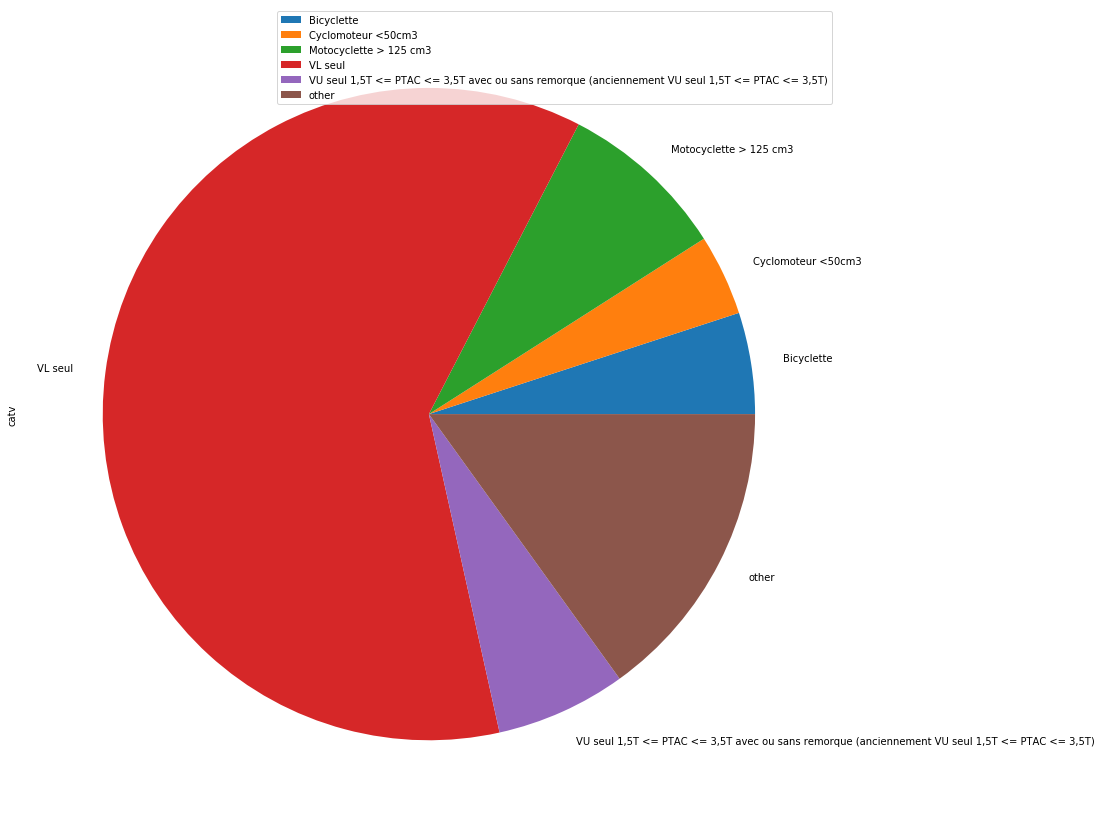

In [10]:
def plot_vehicles_cat(df, figsize=(10,10)):
    """Bar plot number of vehicle per category.


    Parameters
    ----------
    df : pandas.DataFrame
         vehicle per category count DataFrame (get_vehicles_type_df() function).

    """
    df.plot.pie(y='catv', figsize=figsize)
    plt.show()
    
plot_vehicles_cat(vehicles_2018_cat, (15,15))